In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier 



from scipy import stats

In [ ]:
data=pd.read_csv("/content/heart.csv")
data.head()
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Distribution of Heart Disease (Disease /Normal): ((165, 14), (138, 14))


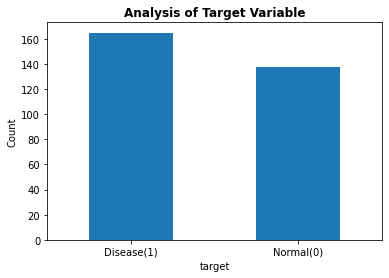

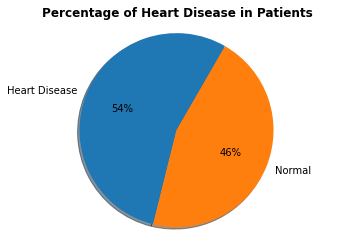

In [ ]:
disease = data[data['target']==1]
normal = data[data['target']==0]
print('Distribution of Heart Disease (Disease /Normal):', (disease.shape,normal.shape))

labels = [ "Disease(1)", 'Normal(0)']
count_classes = data.value_counts(data['target'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Analysis of Target Variable",weight='bold')
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()




labels = [ 'Heart Disease', 'Normal']
sizes = [165,138]
# Plot
plt.pie(sizes, labels=labels, 
        autopct='%1.0f%%', shadow=True, startangle=60)
plt.title('Percentage of Heart Disease in Patients',weight='bold')
plt.axis('equal')
plt.show()

Analysing the Age and Gender of patients 


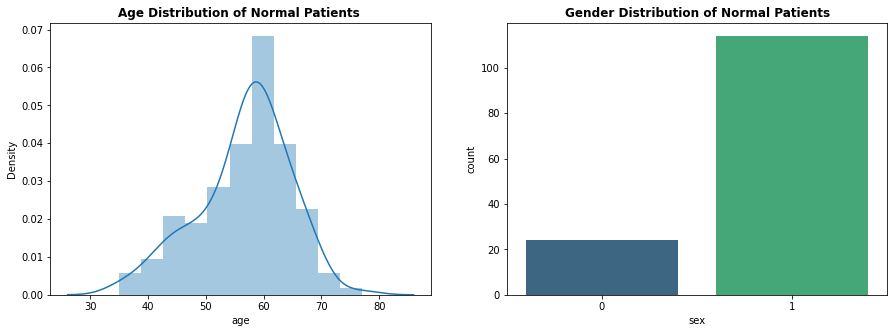

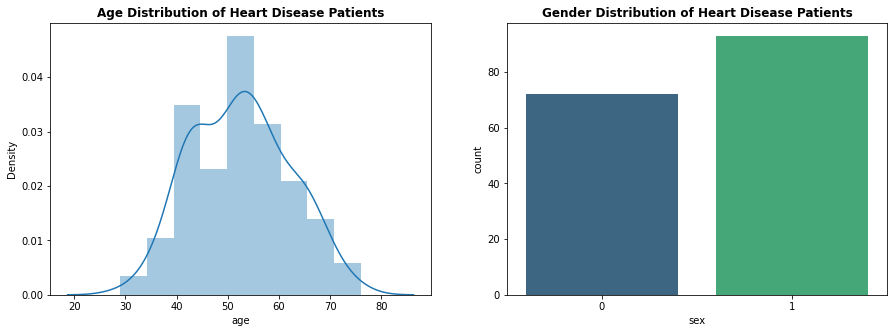

In [ ]:
print('Analysing the Age and Gender of patients ')

# normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(normal['age'])
plt.title('Age Distribution of Normal Patients ', weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(normal['sex'], palette='viridis')
plt.title('Gender Distribution of Normal Patients', weight='bold' )
plt.show()

#heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(disease['age'])
plt.title('Age Distribution of Heart Disease Patients',weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(disease['sex'], palette='viridis')
plt.title('Gender Distribution of Heart Disease Patients',weight='bold' )
plt.show()

Analysing Relationship between variables


Text(0, 0.5, 'ST depression induced by exercise relative to rest')

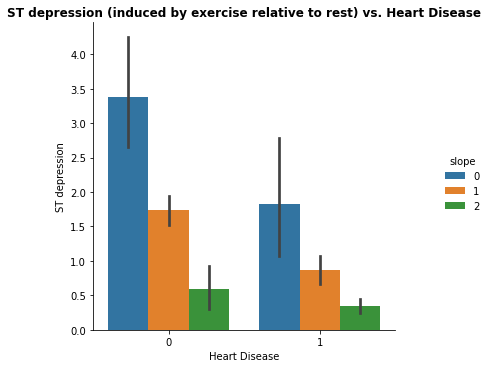

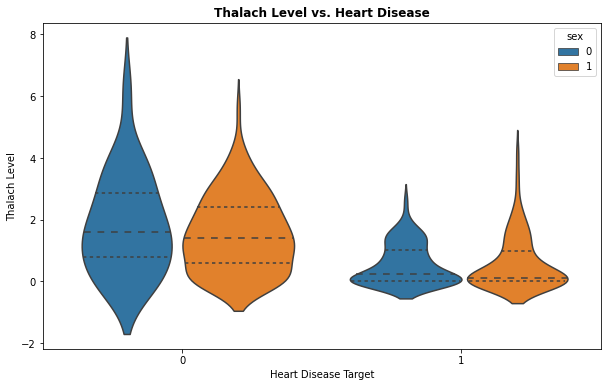

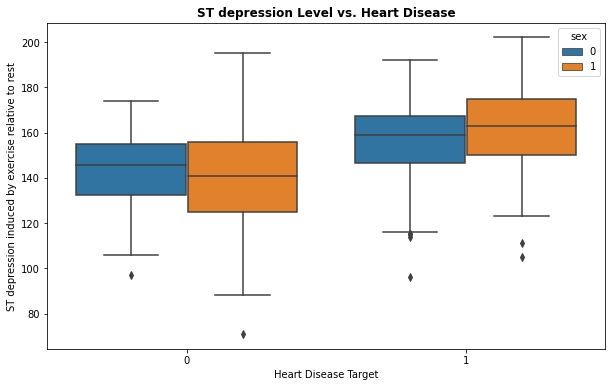

In [ ]:
print('Analysing Relationship between variables')

# ST depression (induced by exercise relative to rest) vs Heart Disease
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',weight='bold')
plt.xlabel('Heart Disease')
plt.ylabel('ST depression')

# Thalach Level vs Heart Disease
plt.figure(figsize=(10,6))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",weight='bold')
plt.xlabel("Heart Disease Target")
plt.ylabel("Thalach Level")

# ST depression level vs Heart Disease
plt.figure(figsize=(10,6))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", weight='bold')
plt.xlabel("Heart Disease Target")
plt.ylabel("ST depression induced by exercise relative to rest")



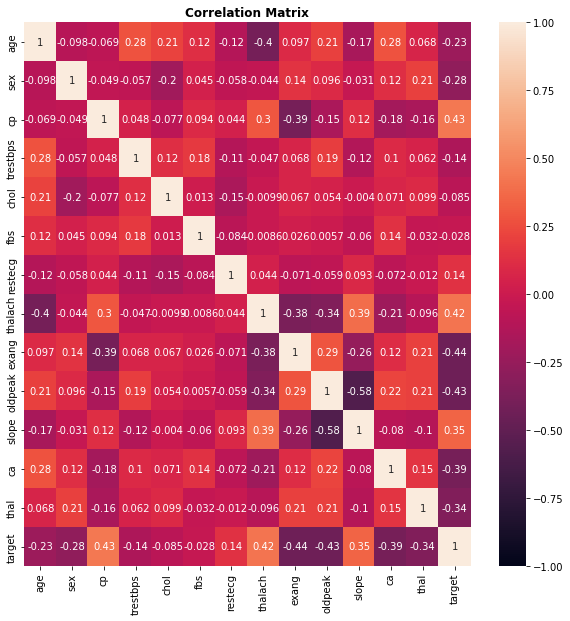

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (10, 10))

sns.heatmap(corrmat, vmin=-1, vmax=1, annot = True)
plt.title('Correlation Matrix',weight='bold')
plt.show()

In [ ]:
# Splitting the dataset
X = data.drop('target', axis = 1).values
y = data['target'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  
print('------------Training Set------------------')
print(x_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(x_test.shape)
print(y_test.shape)

# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

------------Training Set------------------
(242, 13)
(242,)
------------Test Set------------------
(61, 13)
(61,)


In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)



Evaluating Logistic Regression 


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Logistic Regression,0.737705,0.714286,0.806452,0.666667,0.757576,0.736559


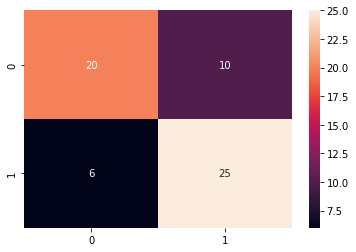

In [ ]:
# Model Evaluation : LR
print('Evaluating Logistic Regression ')
CM=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_lr)
roc=roc_auc_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

model_results =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc]], columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

model_results

In [ ]:
# K Nearest Neighbour
knn = KNeighborsClassifier(9)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,K Nearest Neighbours,0.803279,0.771429,0.870968,0.733333,0.818182,0.802151


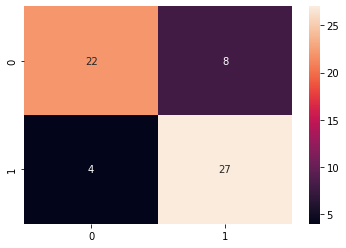

In [ ]:
# Model Evaluation KNN
CM=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_knn)
roc=roc_auc_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

model_results=pd.DataFrame([['K Nearest Neighbours',acc, prec,rec,specificity, f1,roc]], columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

model_results

In [ ]:
# XG Boost
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,XG Boost,0.721311,0.705882,0.774194,0.666667,0.738462,0.72043


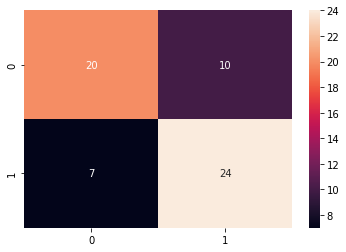

In [ ]:
# Model Evaluation XG Boost
CM=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

model_results =pd.DataFrame([['XG Boost ',acc, prec,rec,specificity, f1,roc]], columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

model_results

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Decision Tree,0.721311,0.75,0.677419,0.766667,0.711864,0.722043


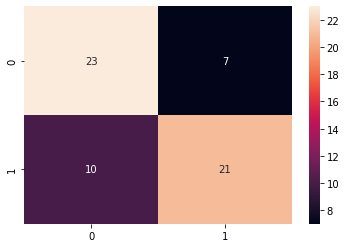

In [ ]:
# Model Evaluation Decision Tree
CM=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_dt)
roc=roc_auc_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

model_results =pd.DataFrame([['Decision Tree ',acc, prec,rec,specificity, f1,roc]], columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

model_results

In [ ]:
# Random Forest 
rf = RandomForestClassifier(random_state=1)# get instance of model
rf.fit(x_train, y_train) # Train/Fit model 
y_pred_rf = rf.predict(x_test) # get y predictions

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Random Forest,0.803279,0.756757,0.903226,0.7,0.823529,0.801613


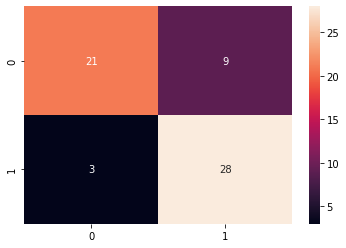

In [ ]:
# Model Evaluation RF
CM=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_rf)
roc=roc_auc_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc]], columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

model_results


In [ ]:
# Naive Bayes
nb = GaussianNB() # get instance of model
nb.fit(x_train, y_train) # Train/Fit model 
y_pred_nb = nb.predict(x_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Naive Bayes,0.770492,0.757576,0.806452,0.733333,0.78125,0.769892


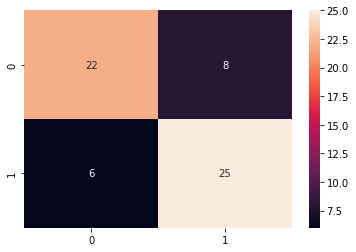

In [ ]:
# Model Evaluation NB
CM=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_nb)
roc=roc_auc_score(y_test, y_pred_nb)
prec = precision_score(y_test, y_pred_nb)
rec = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

model_results =pd.DataFrame([['Naive Bayes ',acc, prec,rec,specificity, f1,roc]], columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

model_results

In [ ]:
data = {        'LR': y_pred_lr,        
                'KNN': y_pred_knn, 
                'XGB': y_pred_xgb, 
                'LR': y_pred_lr, 
                'RF': y_pred_rf,
                'DT': y_pred_dt, 
                'NB': y_pred_nb, 
       }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Naive Bayes,0.770492,0.757576,0.806452,0.733333,0.781250,0.769892
1,LR,0.737705,0.714286,0.806452,0.666667,0.757576,0.736559
2,KNN,0.803279,0.771429,0.870968,0.733333,0.818182,0.802151
3,XGB,0.721311,0.705882,0.774194,0.666667,0.738462,0.720430
4,RF,0.803279,0.756757,0.903226,0.700000,0.823529,0.801613
5,DT,0.721311,0.750000,0.677419,0.766667,0.711864,0.722043
6,NB,0.770492,0.757576,0.806452,0.733333,0.781250,0.769892


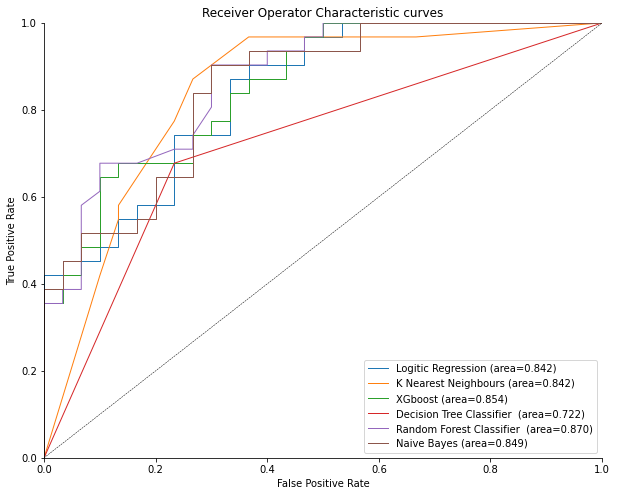

In [ ]:
# Plotting ROC curve

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(10,8))


roc_auc_plot(y_test,lr.predict_proba(x_test),label='Logitic Regression',l='-')
roc_auc_plot(y_test,knn.predict_proba(x_test),label='K Nearest Neighbours',l='-')
roc_auc_plot(y_test,xgb.predict_proba(x_test),label='XGboost',l='-')
roc_auc_plot(y_test,dt.predict_proba(x_test),label='Decision Tree Classifier ',l='-')
roc_auc_plot(y_test,rf.predict_proba(x_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,nb.predict_proba(x_test),label='Naive Bayes',l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')#
sns.despine()

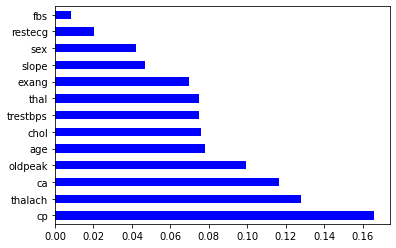

In [ ]:
index= data.columns[:-1]
importance = pd.Series(rf.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

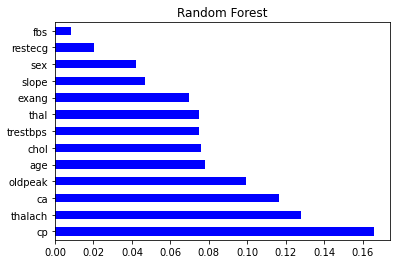

In [ ]:
index= data.columns [:-1]
importance = pd.Series(rf.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter', title='Random Forest')

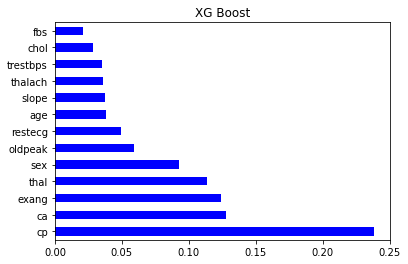

In [ ]:
index= data.columns[:-1]
importance = pd.Series(xgb.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter',title='XG Boost')

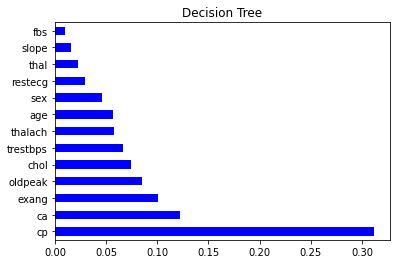

In [ ]:
index= data.columns[:-1]
importance = pd.Series(dt.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter',title='Decision Tree')

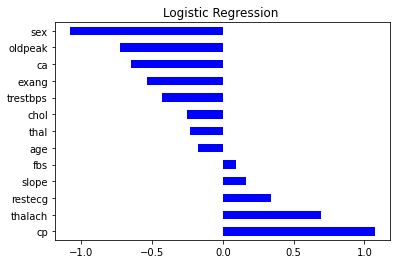

In [ ]:
importance = lr.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance,index=index)
feat_importances.nlargest(20).plot(kind='barh',colormap='winter',title = 'Logistic Regression ')